# 主成分分析的原理與實驗
## 目標: 將兩組資料，分別是紅酒化學成分、乳癌患者腫瘤的影像量測資料，實際以PCA操作降維及觀察結果。

<hr>

## 有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

### 1. 
### 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。藉由熱力圖可已看到原變數的相關係數，粗估判斷多餘的特徵

<AxesSubplot:>

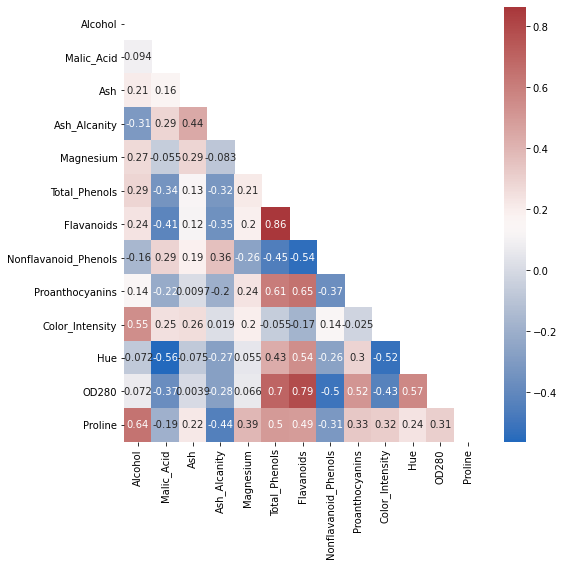

In [87]:
import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt

df = pd.read_excel('wine.xlsx').drop(["Customer_Segment"],axis = 1) #利用drop把Customer_Segment的資料刪除
ratings = np.array(df)
categories = df.columns
df_ = pd.DataFrame(df,columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype = bool))
plt.figure(figsize = (8,8)) #數字會重疊，將圖形放大
seaborn.heatmap(R, annot = True, mask = mask, cmap = 'vlag')

### 討論:
### 熱力圖中越接近紅色，表示變數之間越接近正相關(1)；越接近藍色，表示越接近負相關(-1)。圖中Flavanoids跟Total_Phenols為高度正相關，兩者之間的相關係數達0.86，Hue跟Malic_Acid為高度負相關。

### 2.
### 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

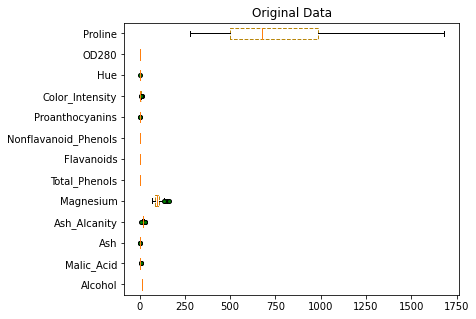

In [88]:
import matplotlib.pyplot as plt
import seaborn

#ratings, categories沿用第一小題
#未標準化
fig, ax = plt.subplots(figsize = (6,5))
boxprops = dict(linestyle = '--',linewidth = 1,color = 'darkgoldenrod') #E59016
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(ratings, labels = categories, boxprops = boxprops, flierprops = flierprops, vert = False)
plt.title('Original Data')
plt.show()

### 討論:
### 每一組的資料分布差距過大，Proline數值較大(偏右)，其他資料數值較小(偏左)，還有變異相差頗大，做主成分分析時可能不利，所以必須先將這些差距以標準化的方式，將數據變成同一個單位，以比較資料。

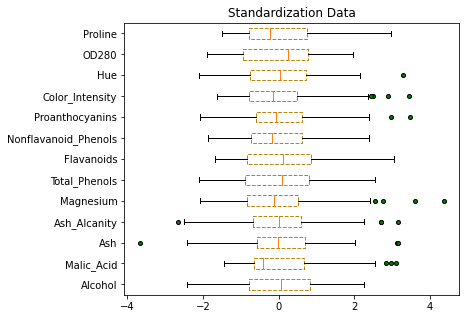

In [89]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

#標準化後
scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)

fig, ax = plt.subplots(figsize = (6,5))
boxprops = dict(linestyle = '--',linewidth = 1,color = 'darkgoldenrod') #E59016
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(ratings_, labels = categories, boxprops = boxprops, flierprops = flierprops, vert = False)
plt.title('Standardization Data')
plt.xticks(np.arange(-4,6,2))
plt.show()

### 討論:
- ### 以未標準化的紅酒評比的資料來看，不同項目的數字大小與變異相差頗大，這對做主成分分析可能不利，因此有必要先將這些差距以標準化的方式拉近。
- ### 將資料標準化，使得平均數為 0 標準差為 1 ，Magnesuim的異常值有較大變異性。由於盒狀圖的Q2不重疊，在95％的可信度下，中位數有所不同。

### 3.
### 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。參考如圖二中排。

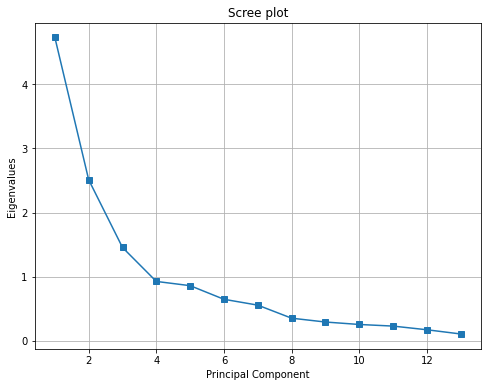

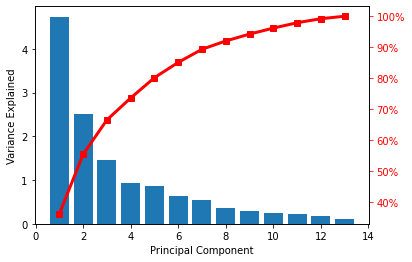

In [90]:
#調整y軸刻度
import numpy as np
from numpy.linalg import eig
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import MultipleLocator

Sx = np.cov(ratings_.T, bias = False) #用標準化後的資料 #row 為 variables, column 為 observation of varaibles #unbias : n-1
w, v = eig(Sx)
index = np.argsort(w)[::-1]
eigvals = w[index]
eigvecs = v[:,index]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

plt.figure(figsize = (8,6)) #設置一個空圖
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

fig, ax = plt.subplots() #設定空圖
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx() #添加坐標軸
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3) #.cumsum: cumulative sum of array
ax2.tick_params(axis='y', colors='red') #控制ticks刻度 #ticks_params(axis='x或y', width,color....)
ax2.yaxis.set_major_formatter(PercentFormatter()) #軸的格式
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

### 討論：
- ### 主成分分析是在不簡化資訊情況下，降低複雜資料，試圖以最少的變數代表原始資料最大的成分（變量），以新變數為原變數的線性組合，並且保留原變數間的最大變異量。
- ### Scree plot 畫的是eigenvalues，會是一個向下(downward)的曲線，然後在elbow的地方彎曲(cutting-off point)，通常在eigenvalue ≥1 的地方。出現特徵值為 0，代表資料矩陣並非 full rank(rank < 5)，也就是資料矩陣的內容有部分相依，或說變數間有相依性，所以非0的特徵值，可說明變數間無相依性，可以用比較少的變數或比較少的資料便能代表原來的資料矩陣。
- ### 如果有太多principal components(大於三個)，PCA 就不會是視覺化資料最好的選擇。
- ### eigenvalue ≥1 的有三個，所以可以認定前三個主成分足夠代表原資料大部分變異量

### 4.
### 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

未標準化的資料

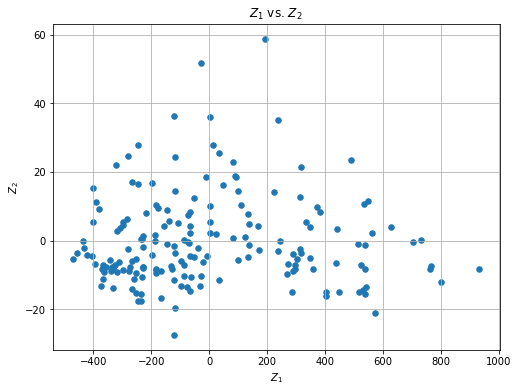

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#未標準化
pca = PCA(n_components=2)
pca_ = pca.fit_transform(ratings)

plt.figure(figsize = (8,6))
plt.scatter(pca_[:,0], pca_[:,1],s = 30)
plt.title("$Z_1$ vs. $Z_2$")
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.show()

### 討論:
### 未標準化看不出來散佈圖中可以分成的群組，較為混亂。

標準化過後的資料

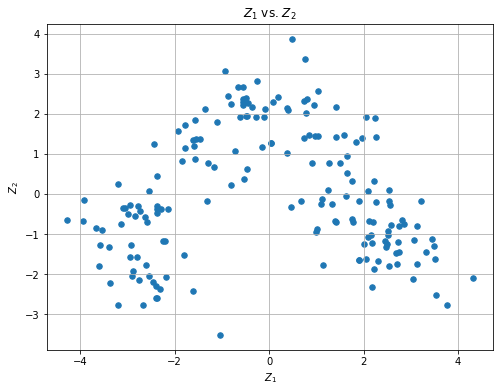

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#標準化
pca = PCA(n_components=2)
pca_ = pca.fit_transform(ratings_)

plt.figure(figsize = (8,6))
plt.scatter(pca_[:,0], pca_[:,1],s = 30)
plt.title("$Z_1$ vs. $Z_2$")
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.show()

### 討論:
### 不看label，其實可以發現圖被劃分為三個區塊，左下跟中上以及右下，跟未標準化差異頗大。

### 5.
### 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

未標準化的資料

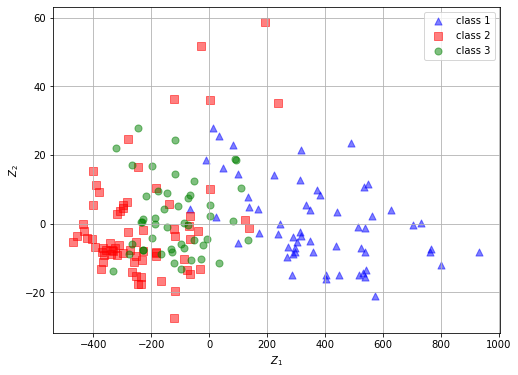

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DF = pd.read_excel('wine.xlsx')
caler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(ratings)

wine_labels = DF.iloc[:,13]
targets = range(1, 4)
labels = ['class 1','class 2','class 3']
colors = ['blue','red','green']
markers = ['^','s','o']

plt.figure(figsize = (8,6))
for target, color, marker in zip(targets,colors,markers):
    plt.scatter(pca_[wine_labels == target,0], pca_[wine_labels == target,1], label = f"class {target}",color = color, alpha = 0.5, marker = marker, s = 50)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

標準化過後的資料

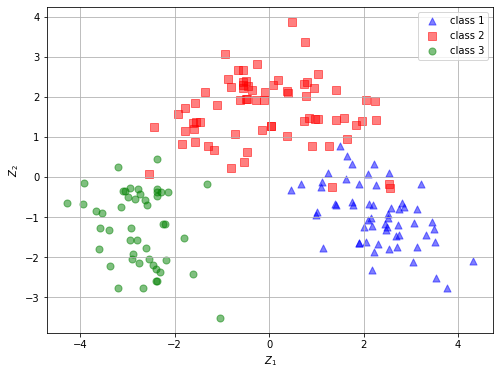

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DF = pd.read_excel('wine.xlsx')
caler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(ratings_)

wine_labels = DF.iloc[:,13]
targets = range(1, 4)
labels = ['class 1','class 2','class 3']
colors = ['blue','red','green']
markers = ['^','s','o']

plt.figure(figsize = (8,6))
for target, color, marker in zip(targets,colors,markers):
    plt.scatter(pca_[wine_labels == target,0], pca_[wine_labels == target,1], label = f"class {target}",color = color, alpha = 0.5, marker = marker, s = 50)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

### 討論:
- ### 依據每個資料的標籤，在散佈圖上畫出資料，使得資料更明顯可看出分成三個群組，且三個群組並沒有太多交集。
- ### 說明了PCA的重要性，未標準化的資料相較於標準化過後的資料更為混亂

### 6.
### 如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

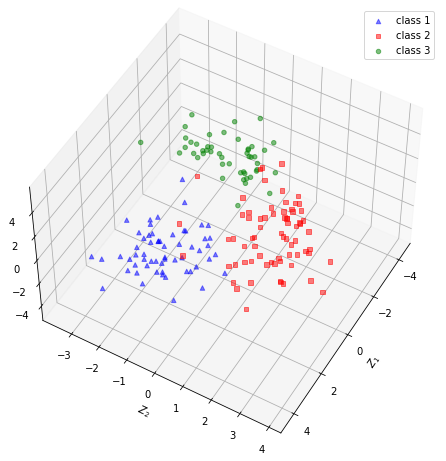

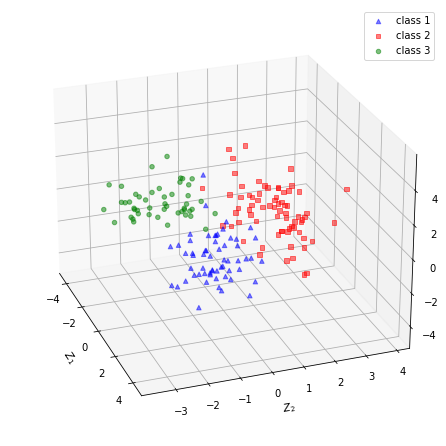

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

DF = pd.read_excel('wine.xlsx')
scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
pca = PCA(n_components=3)
pca_ = pca.fit_transform(ratings_)

wine_labels = DF.iloc[:,13]
targets = range(1, 4)
labels = ['class 1','class 2','class 3']
colors = ['blue','red','green']
markers = ['^','s','o']

#角度1
fig = plt.figure(figsize = (8,6))
ax1 = Axes3D(fig)
for target, color, marker in zip(targets,colors,markers):
    ax1.scatter(pca_[wine_labels == target,0], pca_[wine_labels == target,1],pca_[wine_labels == target,2], label = f"class {target}",color = color, alpha = 0.5,marker = marker)
ax1.view_init(50, 30)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

#角度2
fig = plt.figure(figsize = (8,6))
ax2 = Axes3D(fig)
for target, color, marker in zip(targets,colors,markers):
    ax2.scatter(pca_[wine_labels == target,0], pca_[wine_labels == target,1],pca_[wine_labels == target,2], label = f"class {target}",color = color, alpha = 0.5,marker = marker)
ax2.view_init(25, -20)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

### 討論:
- ### 立體圖的觀賞角度有二個：仰角（elevation）與水平角度（azimuth）。立體圖經過調整，能看到資料是分開且分成三個群組的，因為是立體圖更可以看出資料無太多交集。
- ### 可以發現，在看完scree plot 之後，認定特徵值大於一的前三個主成分可代表大部分原資料，事實上，只需要前兩個主成分即可。

### 7.
### $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1 與 Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？

In [96]:
from numpy.linalg import eig

Sx_numpy = np.cov(ratings_.T,bias = False)
w, v = eig(Sx_numpy) #first is eigenvalue, second is eigenvectors
idx = np.argsort(w)[::-1] #argsort將矩陣中元素由小排到大並回傳小到大的index值
eigvals = w[idx]
eigvecs = v[:, idx] #矩陣[row,column]----> v[:,idx] all row, idx column 
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

print(eigvecs)

[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636  0.39613926 -0.50861912  0.21160473 -0.22591696 -0.26628645
  -0.01496997]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391  0.06582674  0.07528304 -0.30907994  0.07648554  0.12169604
  -0.02596375]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061 -0.17026002  0.30769445 -0.02712539 -0.49869142 -0.04962237
   0.14121803]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914  0.42797018 -0.20044931  0.05279942  0.47931378 -0.05574287
  -0.09168285]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.15636143 -0.27140257  0.06787022  0.07128891  0.06222011
  -0.05677422]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498 -0.40593409 -0.28603452 -0.32013135  0.30434119 -0.30388245
   0.46390791]
 [-0.4229343  -0.003359

In [97]:
#共變異矩陣的前兩個特徵向量
z = pca.components_[:2,:]
print(z) 

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


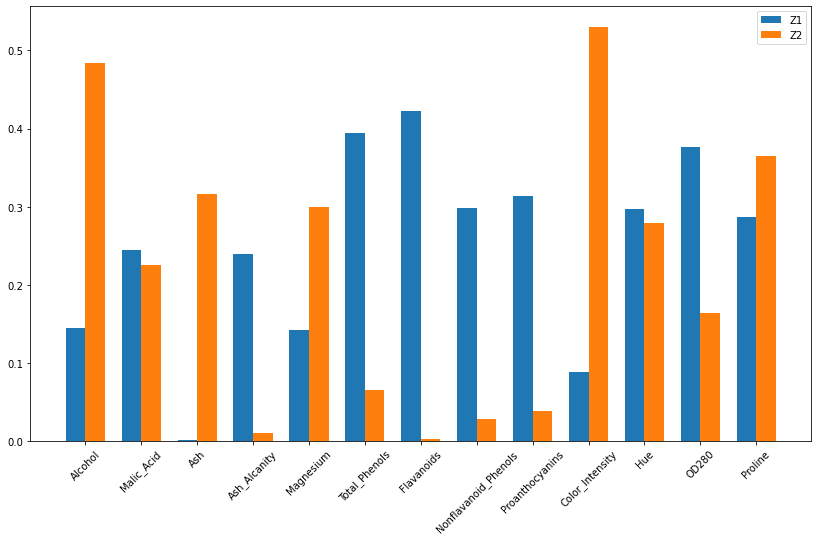

In [98]:
bar_width = 0.35
z = np.abs(pca.components_[:2,:])
x = np.arange(z.shape[1])
categories = df.columns

fig, ax = plt.subplots(figsize = (14,8))
ax.bar(x, z[0,:], width=bar_width,label = "Z1")
ax.bar(x + bar_width, z[1,:], width=bar_width,label = "Z2")
ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(categories,rotation = 45)
plt.legend()
plt.show()

### 結論:
- ### Z1 主要是由 Total_Phenols、Flavanoids、OD280、Proanthocyanins、Nonflavanoid_Phenols 這幾項化學成分所組成
- ### Z2 主要是由 Alcohol、Color_Intensity、Proline、Ash、Magnesium 這幾項化學成分所組成

### 與原變數間的相關係數圖對照，是否透露相同的訊息?

<AxesSubplot:>

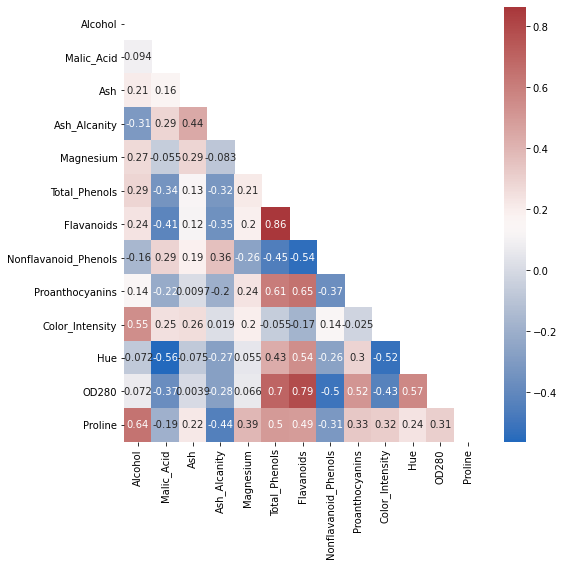

In [99]:
#原變數間的相關係數圖
df = pd.read_excel('wine.xlsx').drop(["Customer_Segment"],axis = 1)
ratings = np.array(df)
categories = df.columns
df_ = pd.DataFrame(df,columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype = bool))
plt.figure(figsize = (8,8)) #數字會重疊，將圖形放大
seaborn.heatmap(R, annot = True, mask = mask, cmap = 'vlag')

### 結論:
### 對原變數間相關係數圖在前面有下過結論，當時的結論為Flavanoids跟Total_Phenols 為主要組成的化學成分，跟上述從直方圖所觀察到的大致一樣
### 像是 Ash_Alcanity、Malic_Acid、Proanthocyanins 就相對地對前兩個主成分較不具重要性

<hr>

## 重複上述紅酒資料的問題，資料是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數 30 個，樣本數 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。由於變數多，因此如前一練習的相關性圖須做些改變。

### 1.
### 繪製變數間的相關係數圖，以觀察變數間是否存在相關性，參考如圖一（或其他類似的圖）。

<AxesSubplot:>

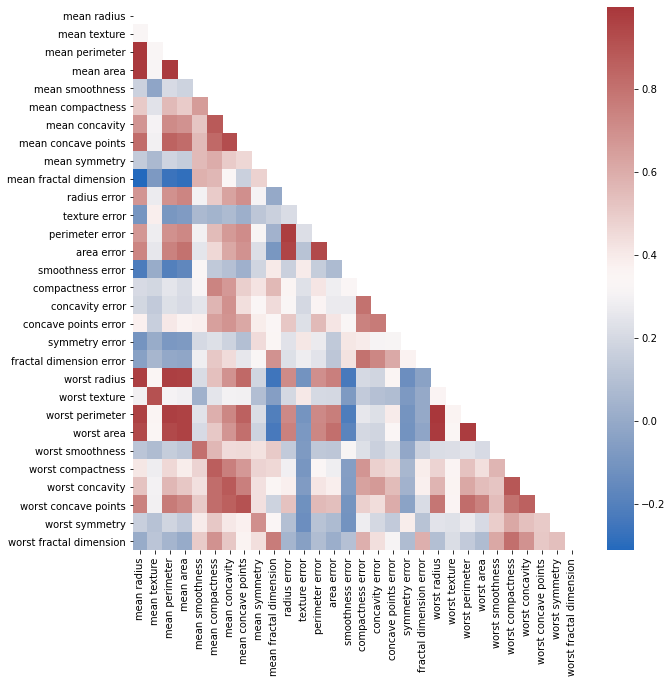

In [100]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = load_breast_cancer()
data = df.data #569x30
categories = df.feature_names
data_ = pd.DataFrame(data,columns = categories)
R = data_.corr()
mask = np.triu(np.ones_like(R, dtype = bool))
plt.figure(figsize = (10,10)) #將圖形放大
seaborn.heatmap(R, annot = False, mask = mask, cmap = 'vlag')


### 討論:
### 因為變數有30個，因此顯示相關係數在圖上不理想，所以利用顏色來判斷相關係數高低。
### 相關係數最高的為 mean perimeter、worst radius、perimeter error、area error...

### 2.
### 繪製一張含每個變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

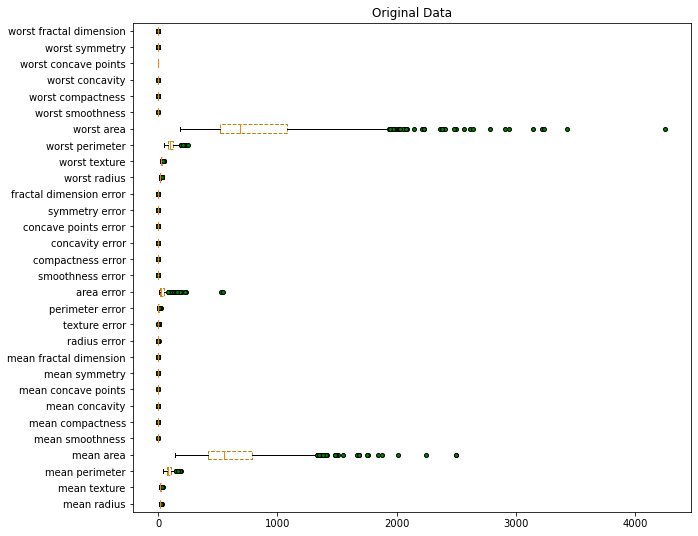

In [101]:
import matplotlib.pyplot as plt
import seaborn

#未標準化
#ratings, categories沿用第一小題
fig, ax = plt.subplots(figsize = (10,9))
boxprops = dict(linestyle = '--',linewidth = 1,color = 'darkgoldenrod') #E59016
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(data_, labels = categories, boxprops = boxprops, flierprops = flierprops, vert = False)
plt.title('Original Data')
plt.show()

### 討論:
### 一樣可以看出每一組資料間分布差距過大，worst_area跟mean_area數值較大(偏右)，其他資料數值較小(偏左)，還有變異相差頗大，做主成分分析時可能不利，所以必須先將這些差距以標準化的方式，將數據變成同一個單位，以比較資料。

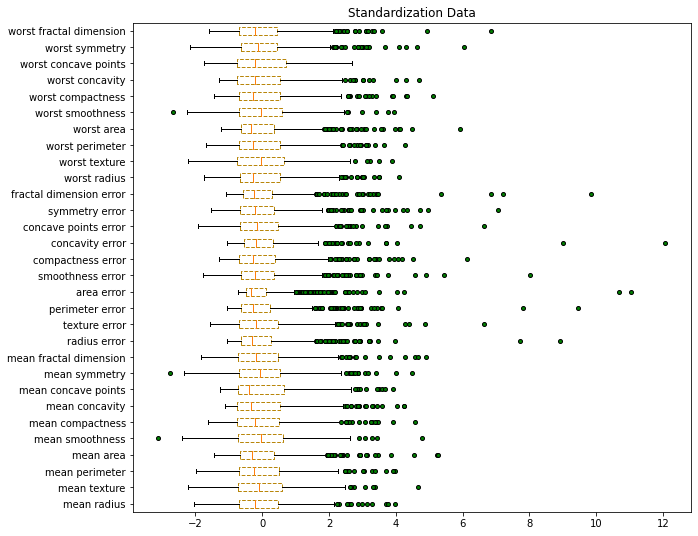

In [102]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

#標準化
scaler = StandardScaler()
scaler.fit(data_)
S_data_ = scaler.transform(data_)

fig, ax = plt.subplots(figsize = (10,9))
boxprops = dict(linestyle = '--',linewidth = 1,color = 'darkgoldenrod') #E59016
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(S_data_, labels = categories, boxprops = boxprops, flierprops = flierprops, vert = False)
plt.title('Standardization Data')
#plt.xticks(np.arange(-4,6,2))
plt.show()

### 討論:
### 將資料標準化，使得平均數為 0 標準差為 1 ，concavity_error的異常值有較大變異性。

### 3.
### 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

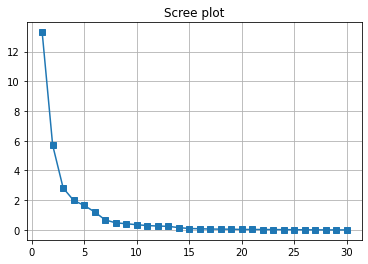

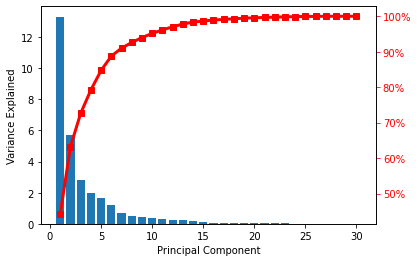

In [103]:
#調整y軸刻度
import numpy as np
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import MultipleLocator
from sklearn.decomposition import PCA

Sx = np.cov(S_data_.T, bias = False) #用標準化後的資料 #row 為 variables, column 為 observation of varaibles #unbias : n-1
X = np.c_[S_data_]
pca = PCA().fit(X)
eigvals = pca.explained_variance_
eigvecs = pca.components_.T

plt.figure() #設置一個空圖
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()

fig, ax = plt.subplots() #設定空圖
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx() #添加坐標軸
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3) #.cumsum: cumulative sum of array
ax2.tick_params(axis='y', colors='red') #控制ticks刻度 #ticks_params(axis='x或y', width,color....)
ax2.yaxis.set_major_formatter(PercentFormatter()) #軸的格式
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

### 討論:
### (1)Scree plot 畫的是eigenvalues，會是一個downward的曲線，然後在elbow的地方彎曲(cutting-off point)，通常是在eigenvalue ≥1 的地方，因為出現特徵值為 0，代表資料矩陣並非 full rank，也就是資料矩陣的內容有部分相依，或說變數間有相依性，所以非0的特徵值，可說明變數間無相依性，可以用比較少的變數或比較少的資料便能代表原來的資料矩陣。
### (2)eigenvalue ≥1 的有6個

### 4.資料中的乳癌患者腫瘤可區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？

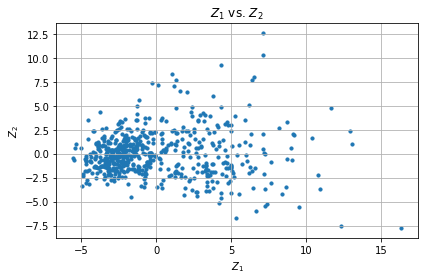

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(data_)
S_data_ = scaler.transform(data_)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(S_data_)
#pca_ = pd.DataFrame(pca.fit_transform(ratings_),columns = ['$Z_1$','$Z_2$'])

plt.figure(figsize = (6,4))
plt.scatter(pca_[:,0], pca_[:,1],s = 10)
plt.title("$Z_1$ vs. $Z_2$")
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.tight_layout()

### 討論:
### 看不出資料分布的情形，資料分布密集。

### 5.再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

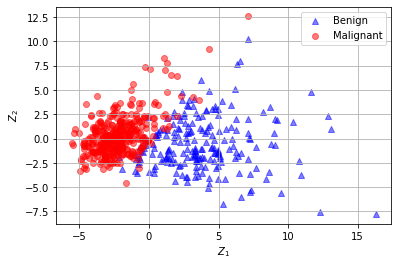

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(data_)
S_data_ = scaler.transform(data_)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(S_data_)

breast_cancer_labels = df.target.reshape((569,1))
cancer_labels = breast_cancer_labels[:,0]
targets = [0,1]
labels = ['Benign','Malignant']
colors = ['blue','red']
markers = ['^','o']

for target, color, marker in zip(targets,colors,markers):
    plt.scatter(pca_[cancer_labels == target,0], pca_[cancer_labels == target,1], label = f"class {target}",color = color, alpha = 0.5, marker = marker)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

### 討論:
### 依據每個資料的標籤畫在散佈圖上，可以清楚的看到資料分布密集但分成惡性、良性兩個群組。

### 6.
### 如果採三個主成分，則可繪製立體圖。觀察立體圖是否比散布圖具備更好的群組分辨能力?旋轉立體圖的角度以取得最好的辨別視野。

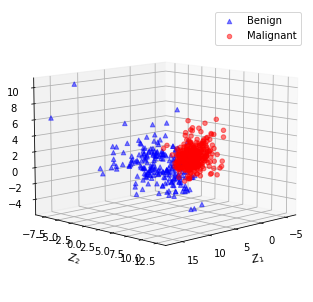

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

scaler = StandardScaler()
scaler.fit(data_)
S_data_ = scaler.transform(data_)
pca = PCA(n_components=3)
pca_ = pca.fit_transform(S_data_)

breast_cancer_labels = df.target.reshape((569,1))
cancer_labels = breast_cancer_labels[:,0]
targets = [0,1]
labels = ['Benign','Malignant']
colors = ['blue','red']
markers = ['^','o']

fig = plt.figure()
ax1 = Axes3D(fig)
for target, color, marker in zip(targets,colors,markers):
    ax1.scatter(pca_[cancer_labels == target,0], pca_[cancer_labels == target,1],pca_[cancer_labels == target,2], label = f"class {target}",color = color, alpha = 0.5,marker = marker)
ax1.view_init(10, 45)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.legend(labels,loc="upper right")
plt.show()

### 討論:
### 立體圖的觀賞角度有二個：仰角（elevation）與水平角度（azimuth）。立體圖經過調整，能看到資料是分開且分成兩個群組的，因為是立體圖更可以看出資料無太多交集。

### 7.
### $Z_1 與 Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1 與 Z_2$ 的組成係數，看出原變數哪個比較重要？與原變數間的相關係數圖對照，是否透露相同的訊息?

In [107]:
#共變異矩陣的前兩個特徵向量
z = pca.components_[:3,:] 
print(z) 

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611303  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853125  0.0645499  -0.00931423  0.02869952 -0.10429199 -0.07409158
   0.00273385 -0.02556351 -0.04023994 -0.02257404  0.26848139  0.37463368
   0.26664538  0.21600651  0.30883901  0.15477964  0.1764637   0.22465763
   0.2885843   0.21150374 -0.04750699

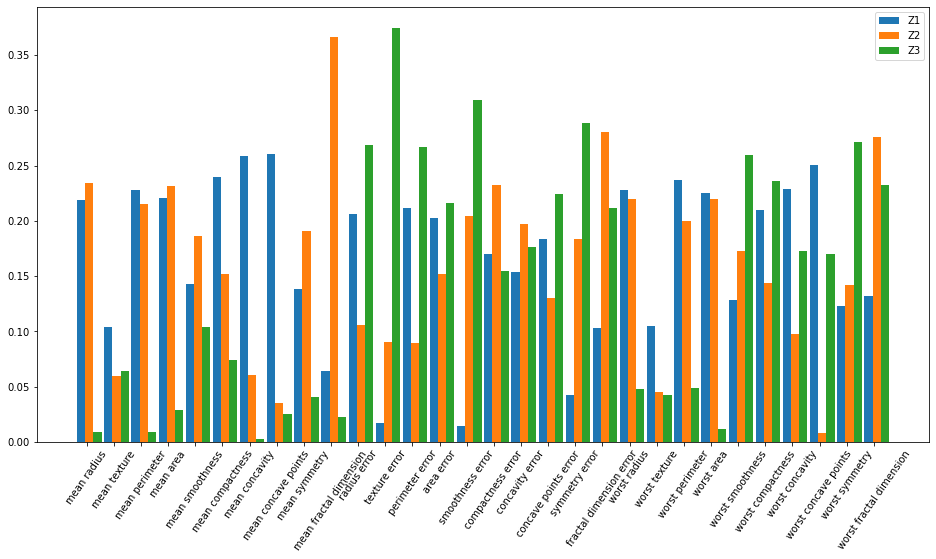

In [108]:
bar_width = 0.3
z = np.abs(pca.components_[:3,:])
x = np.arange(z.shape[1])
# categories = df.columns

fig, ax = plt.subplots(figsize = (16,8))
ax.bar(x, z[0,:], width=bar_width,label = "Z1")
ax.bar(x + bar_width, z[1,:], width=bar_width,label = "Z2")
ax.bar(x + 2*bar_width, z[2,:], width=bar_width,label = "Z3")
ax.set_xticks(x+2*bar_width/3)
ax.set_xticklabels(categories,rotation = 55)
plt.legend()
plt.show()

<AxesSubplot:>

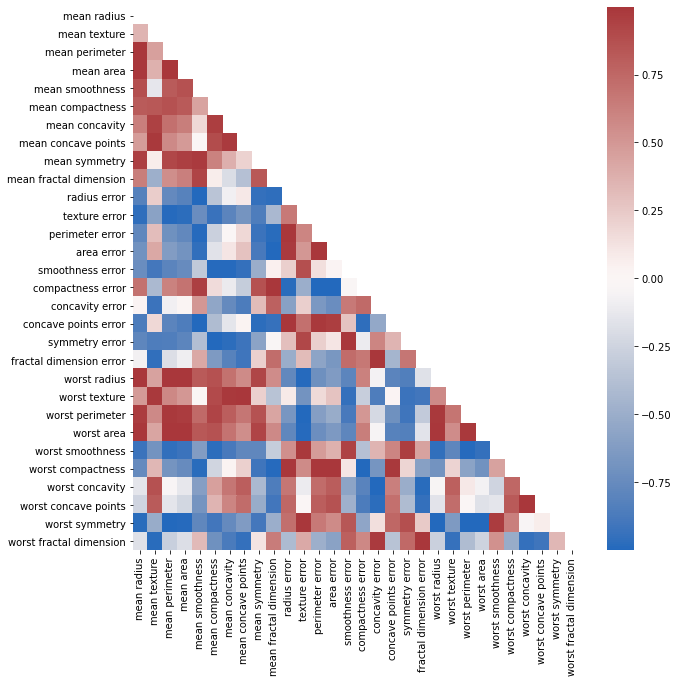

In [109]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = load_breast_cancer()
categories = df.feature_names

z = np.abs(pca.components_[:3,:])
data_ = pd.DataFrame(z,columns = categories)
R = data_.corr()
mask = np.triu(np.ones_like(R, dtype = bool))
plt.figure(figsize = (10,10)) #將圖形放大
seaborn.heatmap(R, annot = False, mask = mask, cmap = 'vlag')


### 結論:
### 可以發現其實這三個主成分大致是由下面幾個變數組成 : mean perimeter、mean area、 area error、 worst area、 mean perimeter, worst perimeter、 worst texture、 mean radius、 worst radius、 worst perimeter 等等這些變數，也就是說原本的 30 個變數基本上只需要取這些拿出來做線性組合組合成 3 個新的變數便可解釋原資料
### 藉由PCA，移除相較不重要的變數，讓分析過程更加輕鬆精確